In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import numpy as np
from helper_functions.grape_functions import *
from main_grape.Grape import Grape
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:



#Defining time scales
total_time = 3.0
steps = 300

state_transfer = True
#Defining H0
qubit_state_num = 2
qubit_num = 1
freq_ge = 3.9#GHz
g = 0.2 #GHz

ens = np.array([ 2*np.pi*ii*(freq_ge) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)


H0 = H_q# + g*X


#Defining Concerned states (starting states)



all_ones_index = 0
for ii in range (qubit_num):
    all_ones_index = all_ones_index + qubit_state_num**ii
#Defining states to include in the drawing of occupation
states_draw_list = [0,all_ones_index]
states_draw_names = ['0','1']

psi0=[0]

#Defining U (Target)

target_vec_0 = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec_0[all_ones_index]=1

target_vec_1 = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec_1[0]=1
    
U = [target_vec_0]

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs

XI = Q_x
ZI = Q_z
Hops = [XI]
ops_max_amp = [2*np.pi*0.3]
Hnames =['x']

print Hnames

#Defining convergence parameters
max_iterations = 5000
decay = 5000 #max_iterations/2
convergence = {'rate':0.1, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-6,'learning_rate_decay':decay}

states_forbidden_list = [all_ones_index]


## without speed up
reg_coeffs = {'envelope':0.01,'dwdt':0.001,'d2wdt2':0.0001*0.001, 'speed_up':0}

## with speed up
# reg_coeffs = {'envelope':0.0,'dwdt':0.00,'d2wdt2':0.00, 'speed_up':100}

## with speed up and noise reduction
#reg_coeffs = {'envelope':0.1,'dwdt':0.001,'d2wdt2':0.0001, 'speed_up':100}


['x']


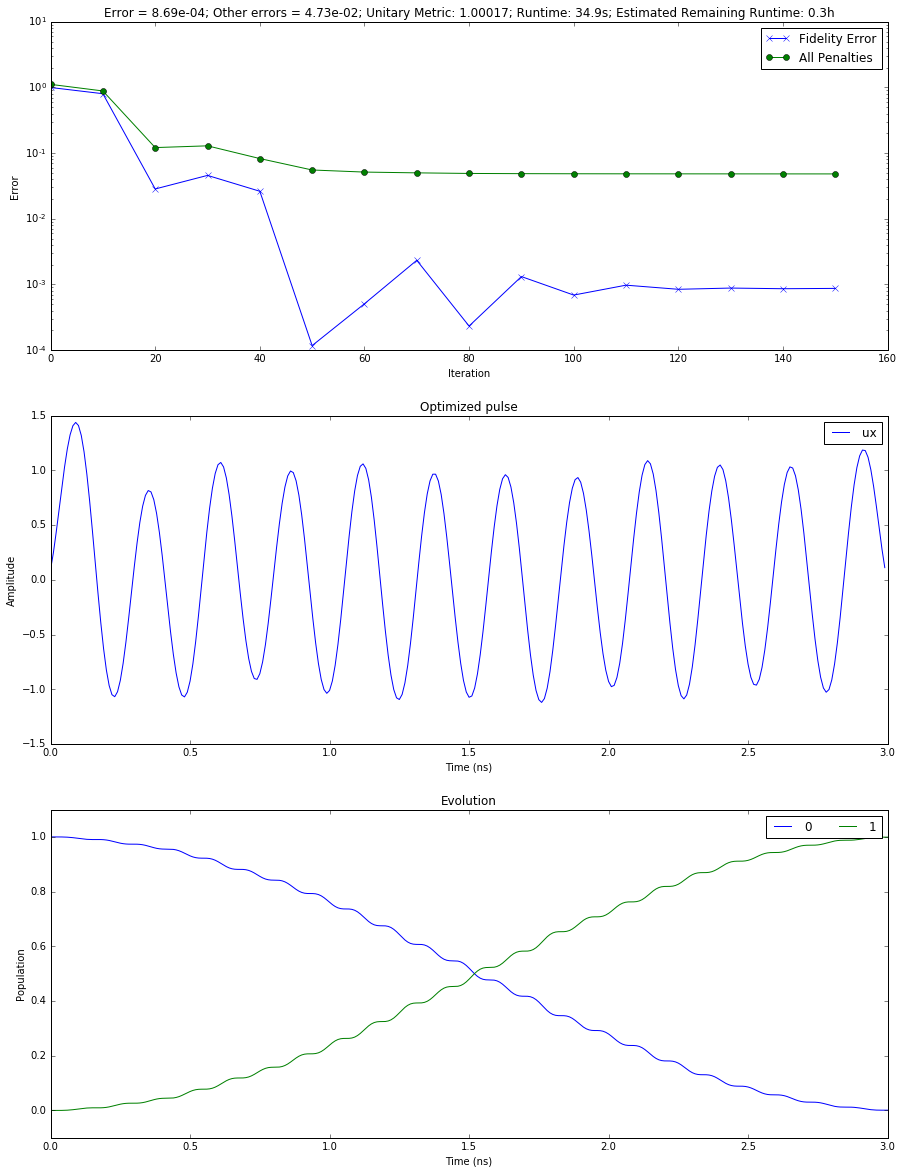

In [ ]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],
                    state_transfer=True,
                    show_plots = True, 
       unitary_error = 1e-6, method = 'Adam',switch = False,  maxA=ops_max_amp,\
                   reg_coeffs=reg_coeffs, file_name='spin_pi_speed_up',
                    data_path = '/home/nelson/Simulations/GRAPE-Data/spin_pi_speed_up')
      
      